<a href="https://colab.research.google.com/github/zeynepbeyzaborekci/Galobal-AI-Summer-Camp-22-/blob/main/End_to_End_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medikal Maliyet Analizi Projesi

> **Amaç:** Verilen değişkenlere göre bir kişinin sağlık
sigortasının yaklaşık ne kadar masraflı olacağını tahmin etmek.

> **Veri Seti:** https://www.kaggle.com/datasets/mirichoi0218/insurance

> Grup Üyeleri

1.   Ahmet Emre Gökalp
2.   Bahadır Özcanlı
3.   Baver Can Aydoğan
4.   Deniz Sakarya
5.   Kadir Dündar
6.   Zehra Özdemir
7.   Zeynep Beyza Börekçi



# 1) Gerekli Kütüphanelerin Eklenmesi


In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import  LabelEncoder

# MODELING
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as mae

import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 2) Keşifsel Veri Analizi

In [46]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


a) BMI Dağılımının İncelenmesi

Text(43, 90, 'ortalama: 30.66')

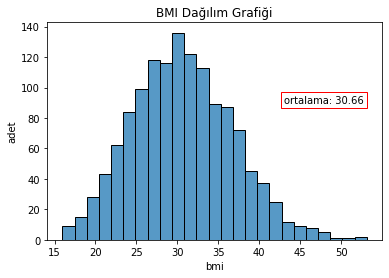

In [ ]:
sns.histplot(x="bmi", data=df)
plt.xlabel("bmi")
plt.ylabel("adet")
plt.title("BMI Dağılım Grafiği")
plt.text(43,90,'ortalama: {:.2f}'.format(df.bmi.mean()), color="black", bbox={'facecolor':'none', 'edgecolor': 'red',
       'boxstyle': 'square'})

b) Smoker ile Charges Arasındaki İlişki

  smoker  counts
0     no    1064
1    yes     274




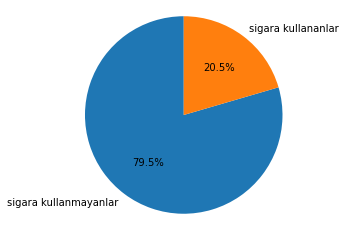

In [107]:
# smoker dağılımını inceleyelim
df2 = df.groupby(['smoker'])['smoker'].size().reset_index(name='counts')
size=df2.counts
fig1, ax1 = plt.subplots()
print(df2)
print("\n")
label="sigara kullanmayanlar", "sigara kullananlar"
ax1.pie(size, labels=label, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

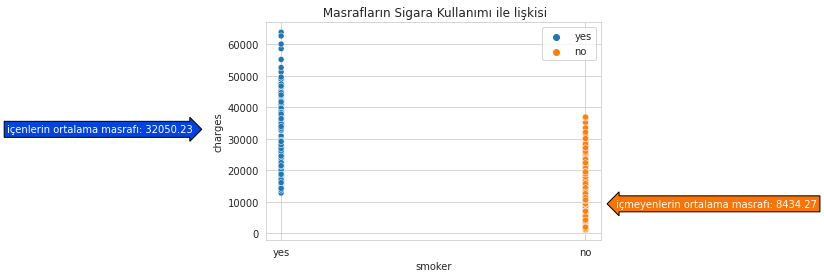

In [196]:
# scatterplot ile dağılımı inceleyelim
sns.scatterplot(data=df, x="smoker",y="charges",hue="smoker")
plt.title(" Masrafların Sigara Kullanımı ile lişkisi")
plt.legend(loc="upper right")
df3=df[df['smoker'].isin(['no'])]
df4=df[df['smoker'].isin(['yes'])]
plt.text(1.1,8434,'içmeyenlerin ortalama masrafı: {:.2f}'.format(df3.charges.mean()), color="white", bbox={'facecolor':'#F97306', 'edgecolor': 'black',
       'boxstyle': 'larrow'})
plt.text(-0.9,32050,'içenlerin ortalama masrafı: {:.2f}'.format(df4.charges.mean()), color="white", bbox={'facecolor':'#0343DF', 'edgecolor': 'black',
       'boxstyle': 'rarrow'})
plt.show()


**Sonuç:** Sigara içenlerin sağlık sigortası masrafları içmeyenlere göre daha fazladır.

c) Smoker ile Region Arasındaki İlişki

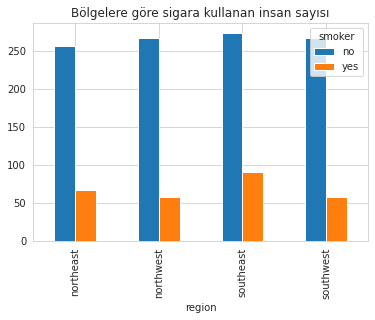

In [197]:
grafik = pd.crosstab(index=df["region"], columns=df["smoker"])
grafik.plot(kind="bar")
plt.title("Bölgelere göre sigara kullanan insan sayısı")
plt.show()

**Sonuç:** Bölgeler arasındaki sigara kullanımında belirgin farklar görülmemektedir.

d) BMI ile Sex Arasındaki İlişki

<function matplotlib.pyplot.show(*args, **kw)>

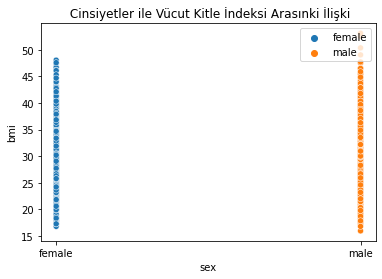

In [6]:
sns.scatterplot(data=df, x="sex",y="bmi",hue="sex")
plt.title(" Cinsiyetler ile Vücut Kitle İndeksi Arasınki İlişki")
plt.legend(loc="upper right")
plt.show

**Sonuç:** Cinsiyetler arasındaki Vücut Kitle İndeksi oranında belirgin farklar görülmemektedir.

e) En Çok Children'a Sahip Region

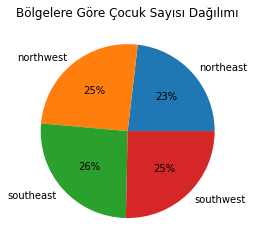

,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


In [12]:

df_children = df[["region", "children"]].groupby(["region"]).agg({"children":"sum"})
plt.pie(df_children.children,labels=df_children.index,autopct = '%0.0f%%')
plt.title("Bölgelere Göre Çocuk Sayısı Dağılımı")
plt.show()
df.groupby("region").agg({"children": "sum"})

**Sonuç:** Southeast en çok çocuk sayısına sahip bölge konumundadır.

f) Age ile Bmi Arasındaki İlişki

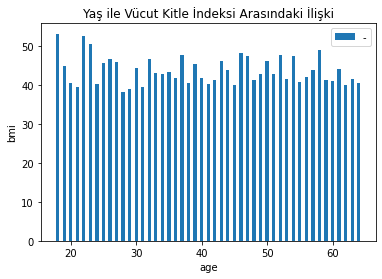

In [14]:
plt.bar(df.age,df.bmi,
label="-",width=.5)

plt.legend()
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('Yaş ile Vücut Kitle İndeksi Arasındaki İlişki')
plt.show()

**Sonuç:** Yaş ile Vücut Kitle İndeksi arasında bir düzen olmadığını görebiliriz. 

g) BMI ile Children Arasındaki İlişki

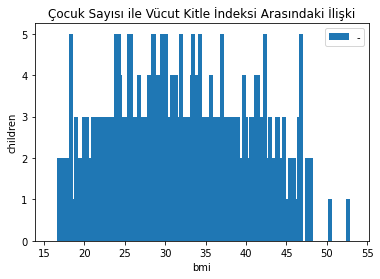

In [16]:
plt.bar(df.bmi,df.children,
label="-",width=.5)

plt.legend()
plt.xlabel('bmi')
plt.ylabel('children')
plt.title('Çocuk Sayısı ile Vücut Kitle İndeksi Arasındaki İlişki')
plt.show()

h) BMI Değişkeninde Outlier

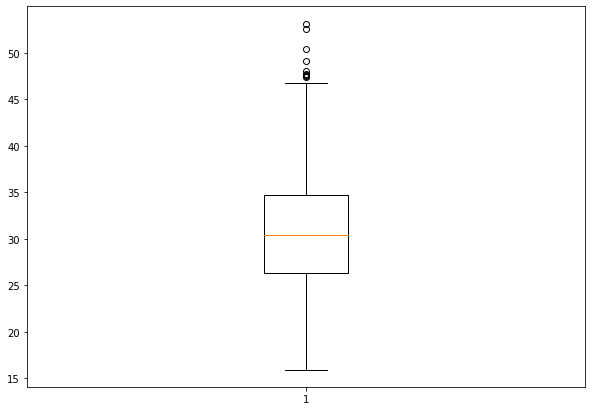

In [17]:
np.random.seed(10)

exData = df['bmi']
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(exData)
 
# show plot
plt.show()

**Sonuç:** Outlier değerler vardır.

ı) BMI ile Charges Arasındaki İlişki

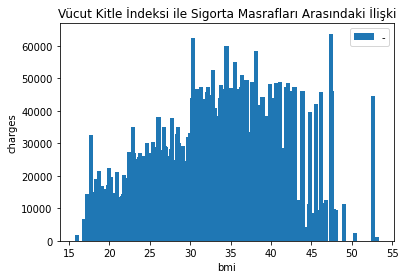

In [18]:
plt.bar(df.bmi,df.charges,
label="-",width=.5)

plt.legend()
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('Vücut Kitle İndeksi ile Sigorta Masrafları Arasındaki İlişki')
plt.show()

**Sonuç:** İki veri arasında belirgin bir düzen görülmemektedir. Daha düşük bmi'a sahip biri daha fazla ücret ödeyebilir.

i) Region, Smoker ve BMI Arasındaki İlişki

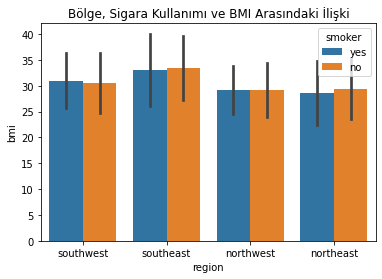

In [20]:
sns.barplot(data=df, x="region", y="bmi", hue="smoker", ci="sd")
plt.title("Bölge, Sigara Kullanımı ve BMI Arasındaki İlişki")
plt.show()

# 3) Veri Ön İşleme

In [50]:
def label_encoder(dataframe, binary_col):
  labelencoder=LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe


label_encoder(df, 'sex')
label_encoder(df, 'smoker')

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [52]:
# Dummy tuzağına takılmamak için ilk sütunu düşürüyoruz
df = pd.get_dummies(df, columns=["region"], drop_first=True) 

In [53]:
X = df.drop('charges', axis=1)
y = df.charges
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55)

In [54]:
ss = StandardScaler()
ss.fit_transform(df)

array([[-1.43876426, -1.0105187 , -0.45332   , ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.76548098,
        -0.61132367, -0.56641788]])

# 5) Model Seçme

In [55]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
          # ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
  # Fitting the model
    m = regressor.fit(X_train, y_train)
  
# Predict the model
    pred = m.predict(X_test)
    rmse = np.sqrt(MSE(y_test, pred))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 6024.8341 (LR) 
RMSE: 6017.9471 (Ridge) 
RMSE: 6024.751 (Lasso) 
RMSE: 9229.5226 (ElasticNet) 
RMSE: 10944.5897 (KNN) 
RMSE: 6078.0649 (CART) 
RMSE: 4664.4897 (RF) 
RMSE: 12415.0436 (SVR) 
RMSE: 4223.3943 (GBM) 
RMSE: 4225.3282 (XGBoost) 
RMSE: 4652.8881 (LightGBM) 


In [56]:
a=XGBRegressor.get_xgb_params
print(np.array(a))

<function XGBModel.get_xgb_params at 0x7f0ce93bab00>


In [57]:
xgboostModel = XGBRegressor(objective='reg:squarederror')

rmse = np.sqrt(MSE(y_test, pred))


xgboostParams = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgboostGsBest = GridSearchCV(xgboostModel,
                            xgboostParams,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [58]:
xgboostGsBest.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [59]:
finalModel = xgboostModel.set_params(**xgboostGsBest.best_params_).fit(X, y)

rmse = np.sqrt(MSE(y_test, pred))
print(rmse)

4652.888077569533


In [60]:
mse = (MSE(y_test, pred))


def mae(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    return  np.mean(np.abs(y_test - pred))

print(mse)
print("##############")
mae(y_test, pred)

21649367.46238871
##############


2781.056650908132